<a href="https://colab.research.google.com/github/tmsk0711/GoingDeeper/blob/main/3_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation
https://youtu.be/JI8saFjK84o
> 데이터셋이 부족할때 가진 데이터를 확대 시키는 것
* 데이터가 많아진다는것은 과적합(overfitting)을 줄일 수 있다.
* 가지고 있는 데이터셋이 실제 상황에서 입력값과 다를 경우 augmentation을 통해 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있다.
* ex) 학습데이터는 노이즈가 많이 없지만 테스트데이터는 노이즈가 많을 때 테스트에서 좋은 성능을 내기 위해 노이즈의 분포를 예측하고 학습 데이터에 노이즈를 삽입해 모델이 노이즈에 잘 대응 할 수 있다.
* 이렇게 augmentation은 데이터를 늘릴 뿐만 아니라 모델이 실제 테스트 환경에서 잘 동작할 수 있도록 도와주기도 한다.

# 텐서플로우 Image Augmentation (1) Flip

In [12]:
import os 

os.environ['my_path'] ='/content/drive/MyDrive/data/mycat.jpeg'
path = os.getenv('my_path')
print(path)


/content/drive/MyDrive/data/mycat.jpeg


In [13]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = path
sample_img_path

'/content/drive/MyDrive/data/mycat.jpeg'

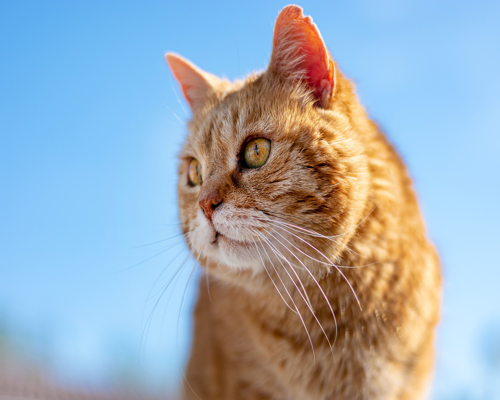

In [14]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

## Flip 해보기
Flip은 flip_left_right 와 flip_up_down 좌우, 상하 반전으로 구분

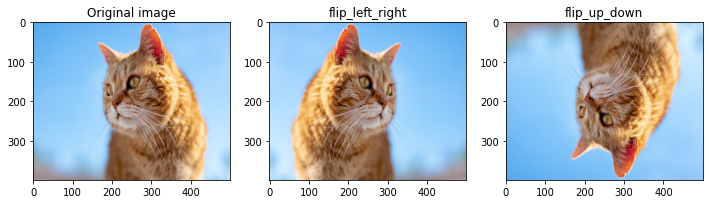

In [15]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

> 이제 확률에 따라서 적용을 해야한다. 그래야 반전이 되지 않은 원본 데이터도 활용할 수있기 때문이다.
* random_flip_left_right
* random_flip_up_down
필요에 따라서 이 둘을 합쳐서 random_flip으로 상하좌우 반전을 적용하는 함수 만들기

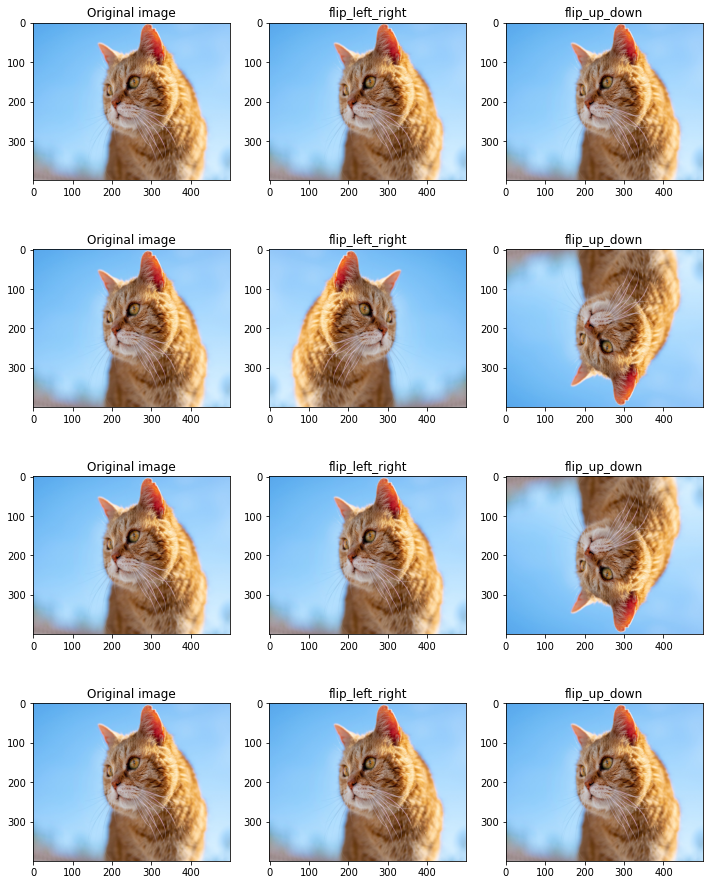

In [16]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

# 텐서플로우 Image Augmentation (2) Center Crop
> Center crop은 중앙을 기준으로 자른 이미지를 사용하는 augemntation 기법
* central_fraction : 얼마나 확대 할지 조절하는 매개변수(1.0)인경우 원본 이미지와 같다. 
* 0.25 수준으로 내려가면 털만 보이고 고양이 형상을 찾기 어려울 수있다. 따라서 central_fraction의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절 해야한다.

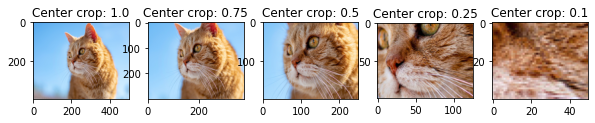

In [19]:
plt.figure(figsize=(12,15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
  cropped_tensor = tf.image.central_crop(image_tensor, frac)
  cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

  plt.subplot(1, col+1, i+1)
  plt.title(f'Center crop: {frac}')
  plt.imshow(cropped_img)  

> * 랜덤하게 적용하는 함수는 텐서플로우에서 제공하지 않음
tf.random.unifrom 사용
* central_fraction 매개변수에 전달할 값을 만들고 이를 사용해 cropped_tensor를 만드는 random_central_crop()함수

In [29]:
def random_central_crop(image_tensor, range=(0, 1)):
  central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
  cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
  return cropped_tensor


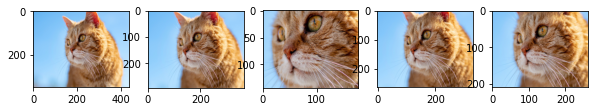

In [30]:
  plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

# 텐서플로우 Image Augmentation 직접 사용

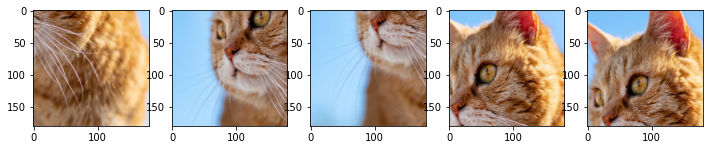

In [42]:
plt.figure(figsize=(12,15))


for i in range(5):

  random_crop = tf.image.random_crop(image_tensor, size=([180,180,3]))
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop)

  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)
  

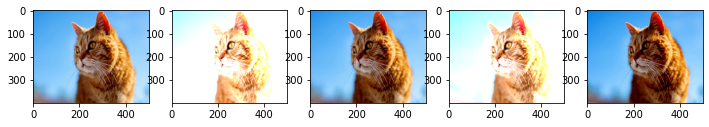

In [50]:
plt.figure(figsize=(12,15))


for i in range(5):

  random_bright = tf.image.random_brightness(image_tensor, 128)
  random_bright = tf.clip_by_value(random_bright,0,255)
  random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright)

  plt.subplot(1,5,i+1)
  plt.imshow(random_bright_image)
  

# albumentations 라이브러리 사용